# **Logistic Regression**

The main goal of logistic regression is to address classification issues. This is achieved by forecasting categorical results, often utilized in classification projects to predict the likelihood of an instance belonging to a specific class or not. Logistic regression is employed for binary classification by utilizing a sigmoid function which takes independent variables as input and generates a probability value ranging from 0 to 1.


In [3]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

Accuracy: 0.825


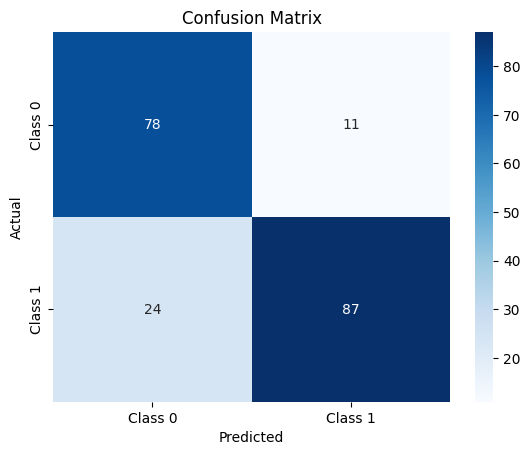

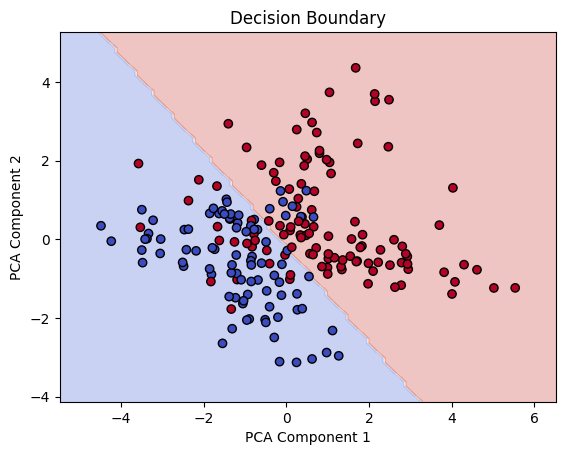

In [4]:
# testing working by Generating a dataset
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from sklearn.metrics import accuracy_score, confusion_matrix
    from sklearn.decomposition import PCA
    import matplotlib.pyplot as plt
    import seaborn as sns

    # binary classification dataset
    X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = LogisticRegression(learning_rate=0.01, n_iterations=1000)
    regressor.fit(X_train, y_train)

    predictions = regressor.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {accuracy}')

    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Reduce to 2D for visualization using PCA
    pca = PCA(n_components=2)
    X_test_2d = pca.fit_transform(X_test)

    x_min, x_max = X_test_2d[:, 0].min() - 1, X_test_2d[:, 0].max() + 1
    y_min, y_max = X_test_2d[:, 1].min() - 1, X_test_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_transformed = pca.inverse_transform(grid)
    probs = regressor.predict(grid_transformed).reshape(xx.shape)
    plt.contourf(xx, yy, probs, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('Decision Boundary')
    plt.show()